In [ ]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load a CSV file
df = pd.read_csv('/content/Crowd data for anomaly detection.csv')

In [ ]:
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [ ]:
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123.000000
mean,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,0.509265
std,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,0.857201
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


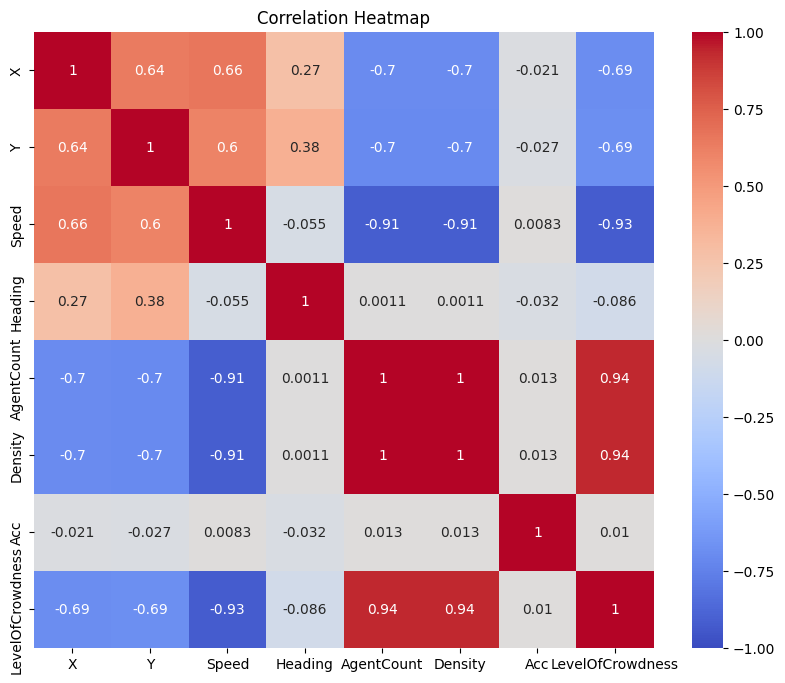

In [ ]:
# Select specific columns to include in the correlation matrix
columns_of_interest = ['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness']
selected_df = df[columns_of_interest]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Rotate the labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Identify rows where 'Acc' column is null
rows_with_null_acc = df[df['Acc'].isnull()]

# Apply your desired method to counter null values for those rows
# For example, filling null values with the mean of 'Acc'
mean_acc = df['Acc'].mean()
df.loc[rows_with_null_acc.index, 'Acc'] = mean_acc  # Update only the 'Acc' column for the selected rows

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24123 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


In [ ]:
# Initialize a dictionary to hold LevelOfCrowdness as keys and sets of Density as values
crowdness_dict = defaultdict(set)

# Iterate over the DataFrame and populate the dictionary
for _, row in df.iterrows():
    level_of_crowdness = row['LevelOfCrowdness']
    density = row['Density']
    crowdness_dict[level_of_crowdness].add(density)

# Convert sets to sorted lists
sorted_crowdness_dict = {k: sorted(v) for k, v in crowdness_dict.items()}

for i in sorted_crowdness_dict:
    print(str(i) + " " + str(sorted_crowdness_dict[i]) )

1 [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69,

LevelOfCrowdness: Range in density

1: 0.01 to 1.78

2: 1.79 to 2.00

3: 2.01 to 3.99

4: 4.00 to 4.89

5: 4.90 to 9.90

Density = AgentCount / 100

In [ ]:
# Drop multiple columns
columns_to_drop = ['Density', 'LevelOfCrowdness', 'label2']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       24123 non-null  object 
 1   X               24123 non-null  float64
 2   Y               24123 non-null  float64
 3   Speed           24123 non-null  float64
 4   Heading         24123 non-null  float64
 5   AgentCount      24123 non-null  int64  
 6   Acc             24123 non-null  float64
 7   label           24123 non-null  int64  
 8   Severity_level  24123 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.7+ MB


In [ ]:
# Function to convert time strings to seconds for easier comparison
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Load the CSV file into a DataFrame
file_path = '/content/Crowd data for anomaly detection.csv'
data = pd.read_csv(file_path)

# Initialize variables
previous_time = None
break_indices = []

# Find break points
for i, row in data.iterrows():
    current_time = time_to_seconds(row['timestamp'])
    if previous_time is not None and current_time != previous_time + 1:
        break_indices.append(i)
    previous_time = current_time

# Function to save DataFrame chunks to CSV
def save_chunk_to_csv(data, start_idx, end_idx, chunk_num):
    chunk = data.iloc[start_idx:end_idx]
    chunk.to_csv(f'device_{chunk_num}.csv', index=False)

# Save each chunk to a new CSV file
start_idx = 0
for chunk_num, break_idx in enumerate(break_indices, start=1):
    save_chunk_to_csv(data, start_idx, break_idx, chunk_num)
    start_idx = break_idx

# Save the last chunk
save_chunk_to_csv(data, start_idx, len(data), len(break_indices) + 1)

print(f"CSV file has been split into {len(break_indices) + 1} files.")

CSV file has been split into 18 files.


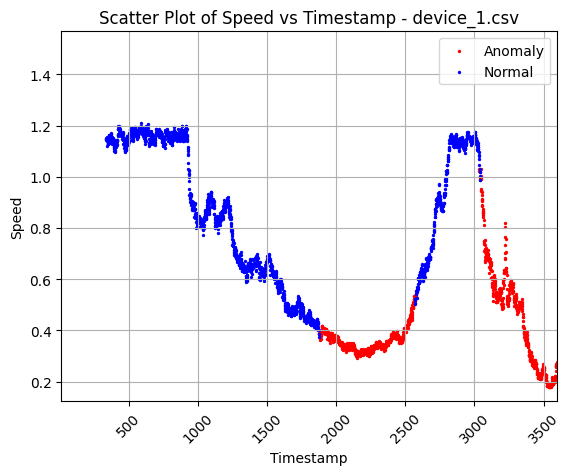

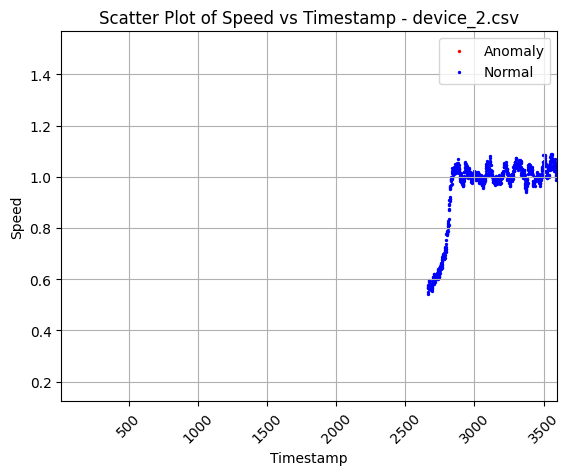

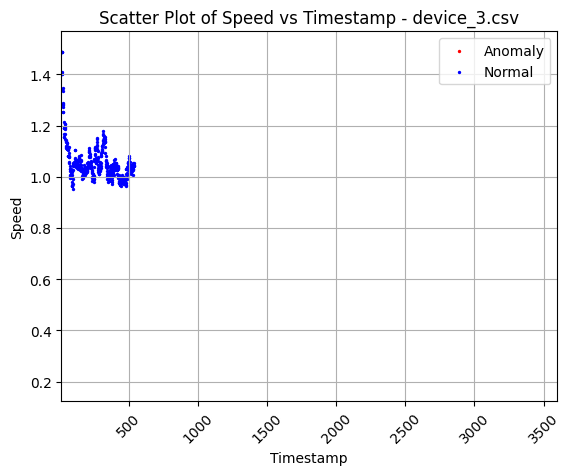

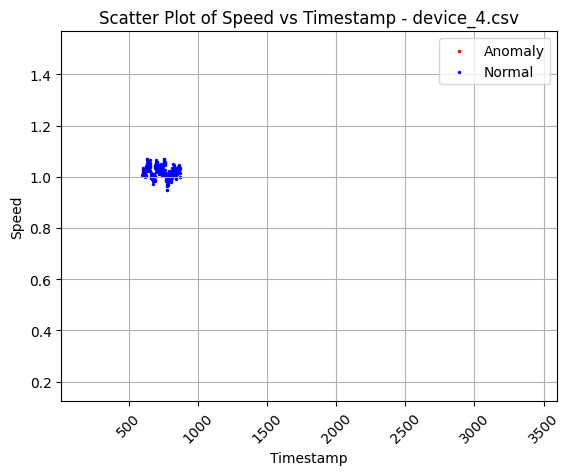

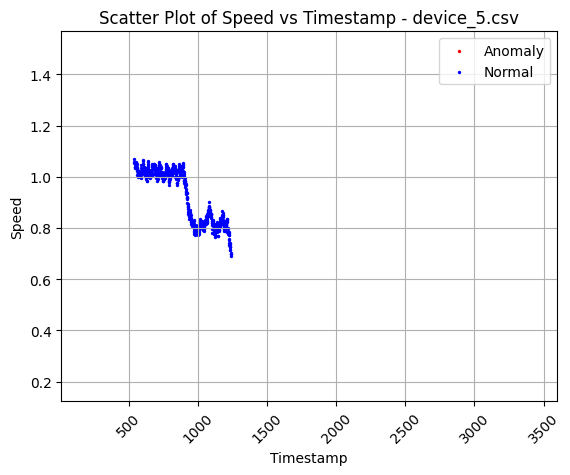

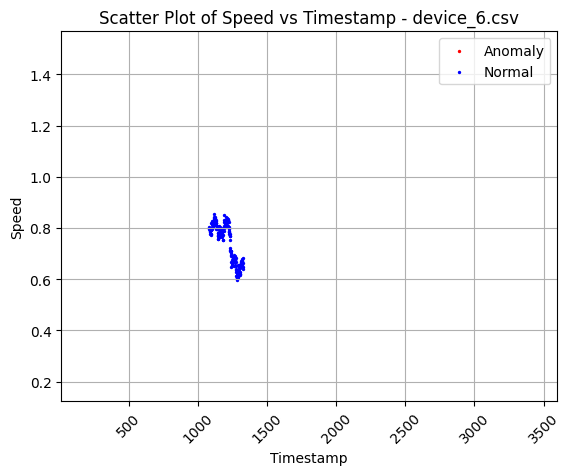

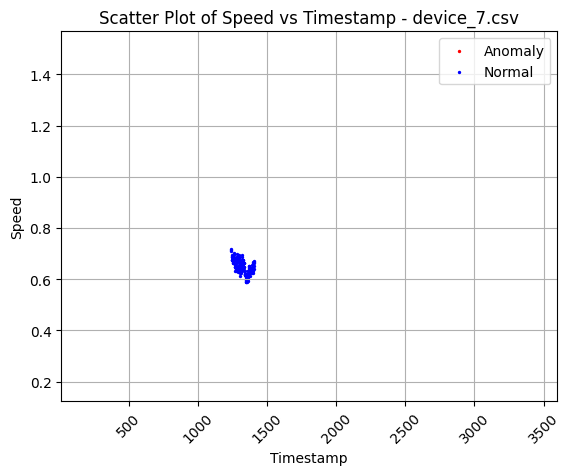

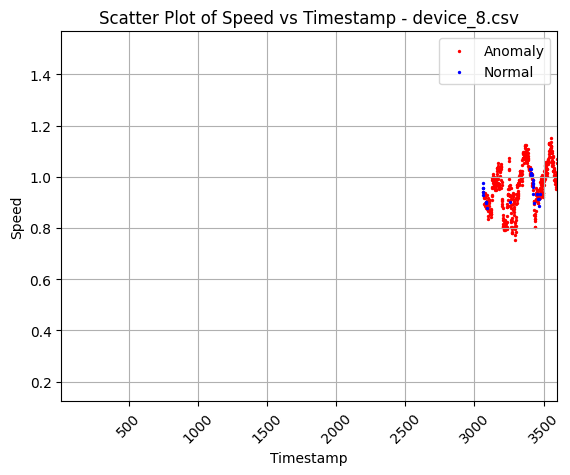

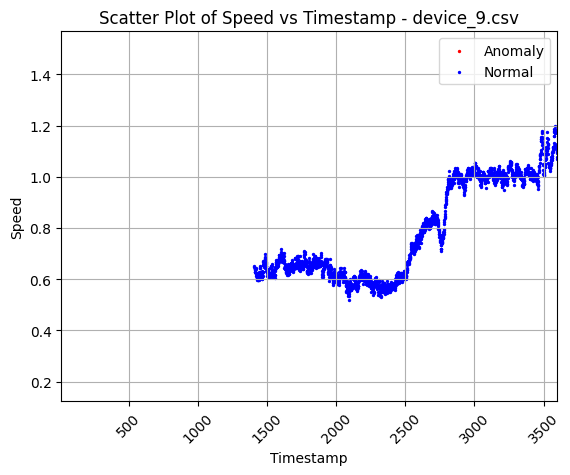

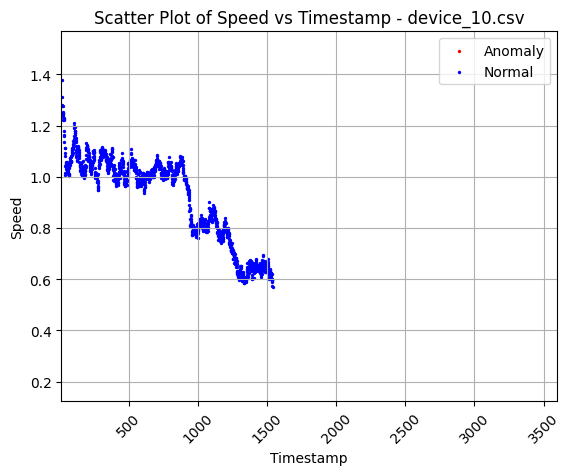

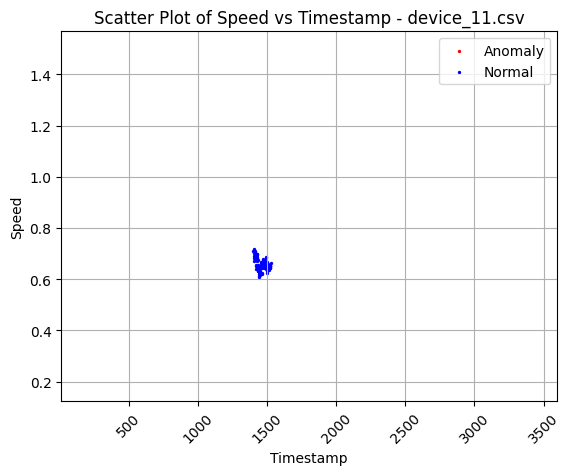

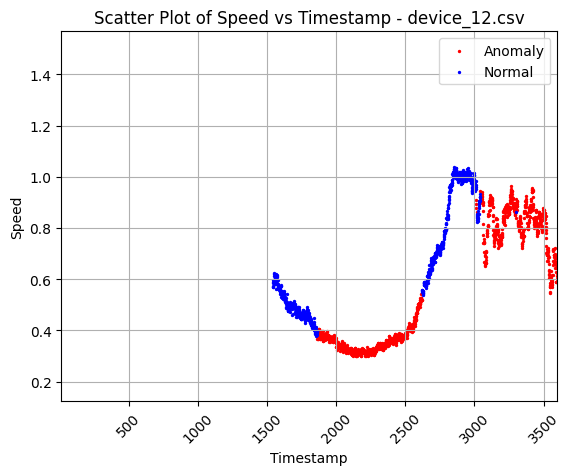

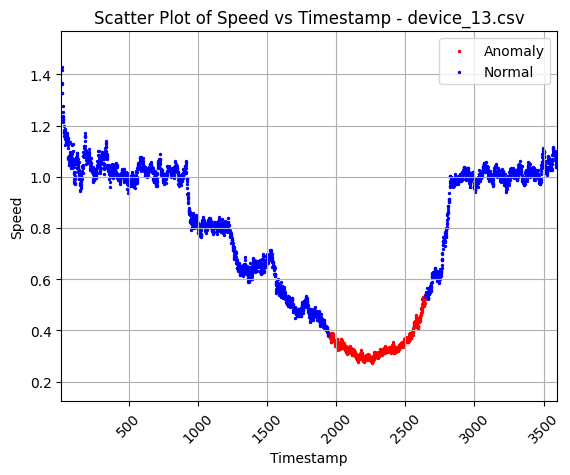

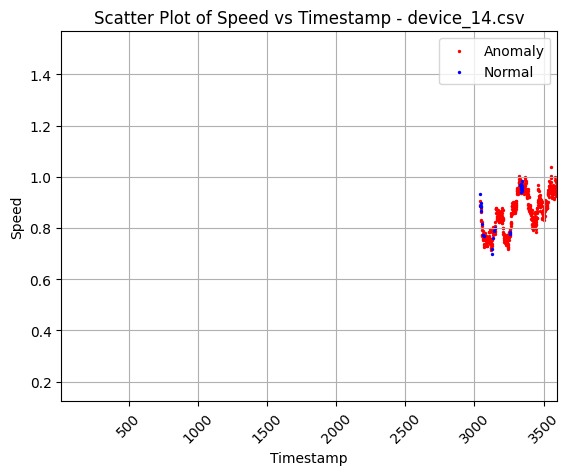

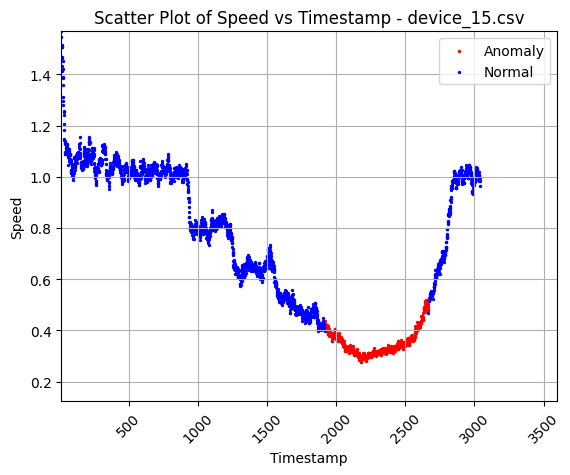

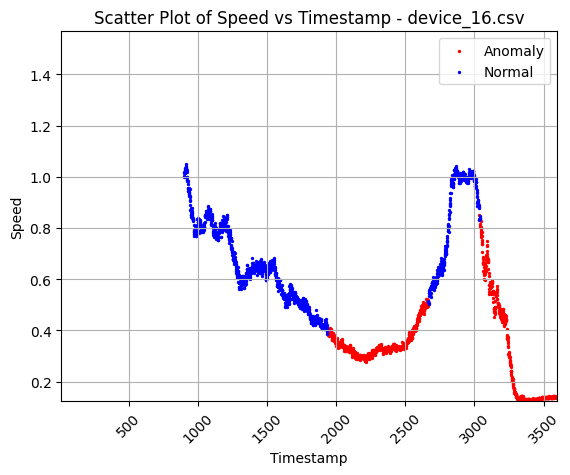

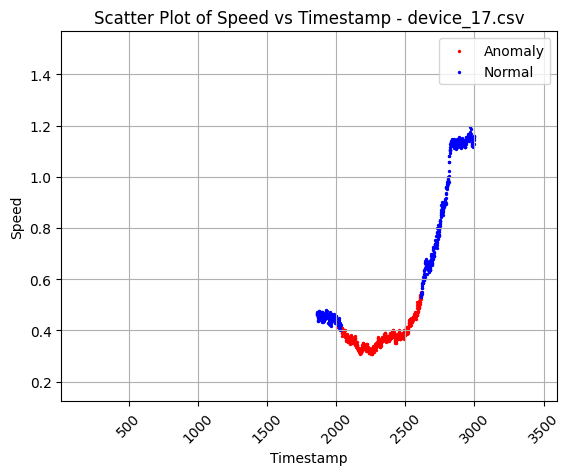

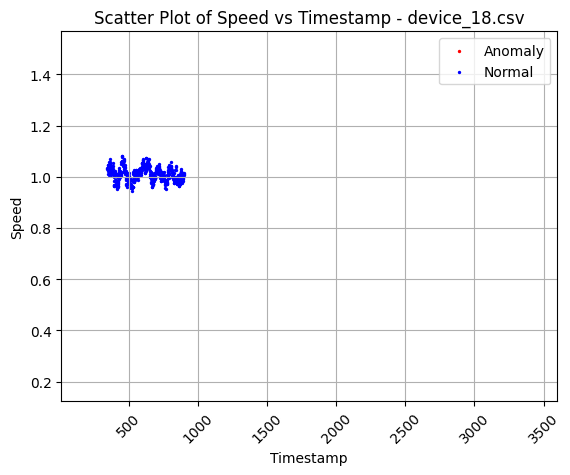

In [ ]:
# Function to plot scatter plot for each CSV file
def plot_scatter_for_csv(csv_file, min_timestamp, max_timestamp, min_speed, max_speed):
    # Load CSV file into a DataFrame
    data = pd.read_csv(csv_file)

    # Convert timestamp strings to seconds
    data['timestamp_seconds'] = data['timestamp'].apply(time_to_seconds)

    # Separate points labeled as 1
    data_anomaly = data[data['label'] == 1]
    data_normal = data[data['label'] != 1]

    # Plot scatter plot of 'Speed' vs 'timestamp'
    plt.figure()

    # Plot points labeled as 1 in red (anomaly)
    plt.scatter(data_anomaly['timestamp_seconds'], data_anomaly['Speed'], color='red', label='Anomaly', s=2)

    # Plot other points in blue (normal)
    plt.scatter(data_normal['timestamp_seconds'], data_normal['Speed'], color='blue', label='Normal', s=2)

    # Set the limits of the axes
    plt.xlim(min_timestamp, max_timestamp)
    plt.ylim(min_speed, max_speed)

    plt.xlabel('Timestamp')
    plt.ylabel('Speed')
    plt.title(f'Scatter Plot of Speed vs Timestamp - {csv_file}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)  # Add grid lines
    plt.legend()
    plt.show()

# Initialize variables to store overall minimum and maximum values of timestamp and Speed
min_timestamp, max_timestamp = float('inf'), float('-inf')
min_speed, max_speed = float('inf'), float('-inf')

# Iterate over each CSV file to find overall minimum and maximum values of timestamp and Speed
for i in range(1, len(break_indices) + 2):
    csv_file = f'device_{i}.csv'
    data = pd.read_csv(csv_file)
    min_timestamp = min(min_timestamp, data['timestamp'].apply(time_to_seconds).min())
    max_timestamp = max(max_timestamp, data['timestamp'].apply(time_to_seconds).max())
    min_speed = min(min_speed, data['Speed'].min())
    max_speed = max(max_speed, data['Speed'].max())

# Iterate over each CSV file and plot scatter plot
for i in range(1, len(break_indices) + 2):
    csv_file = f'device_{i}.csv'
    plot_scatter_for_csv(csv_file, min_timestamp, max_timestamp, min_speed, max_speed)

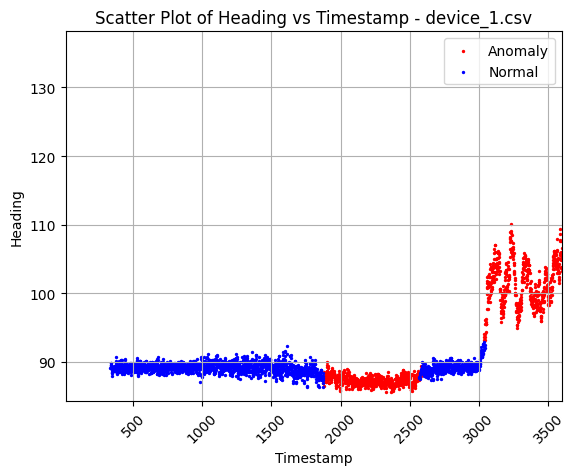

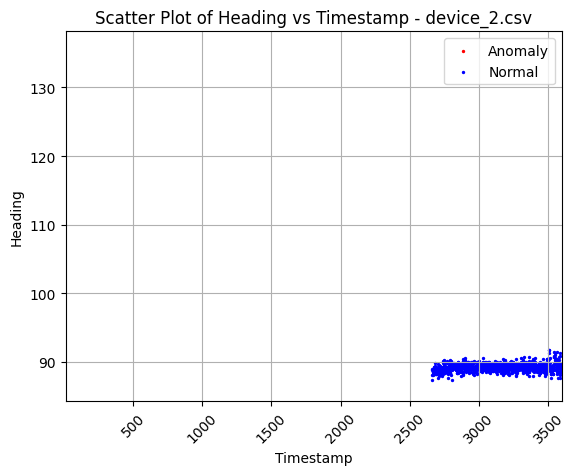

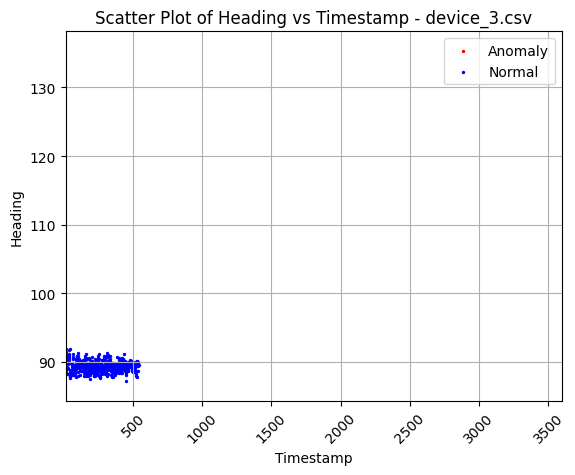

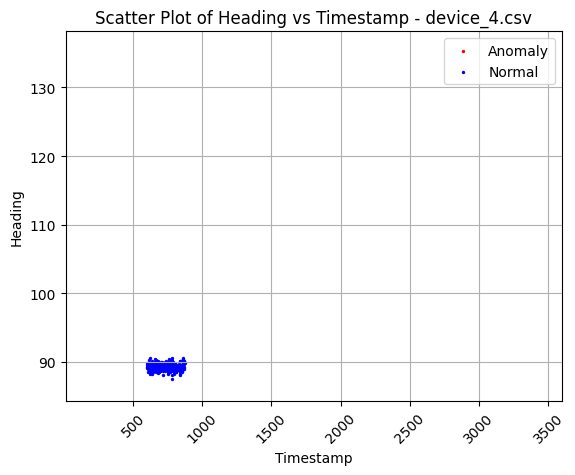

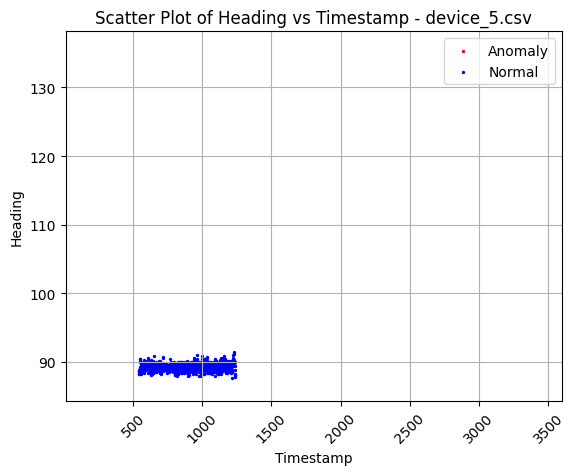

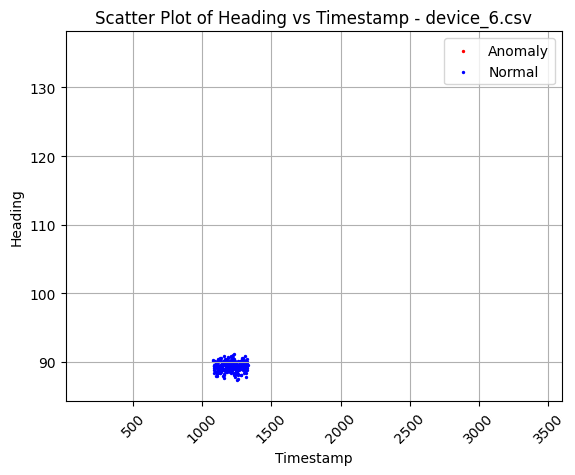

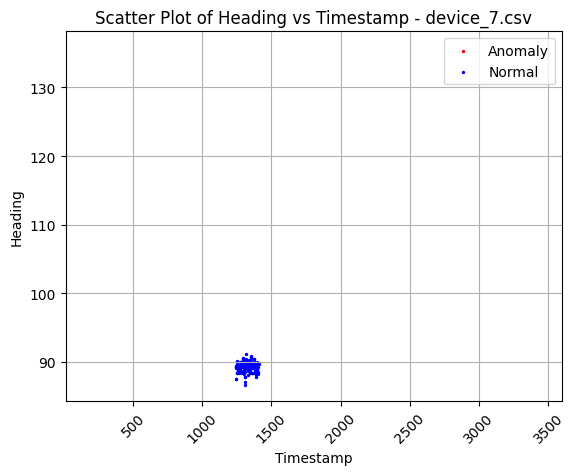

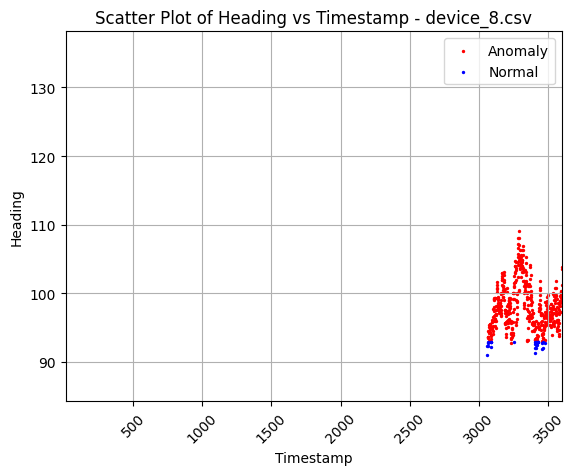

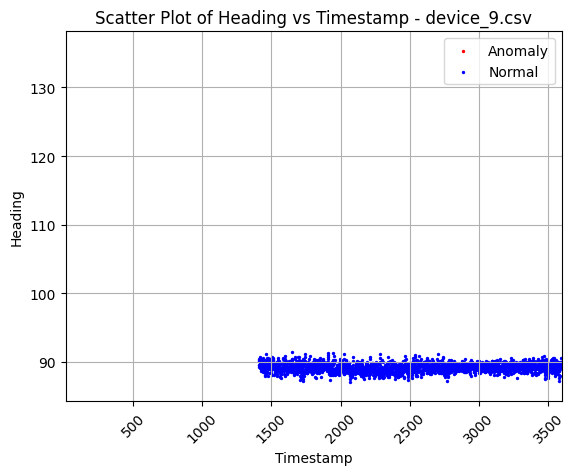

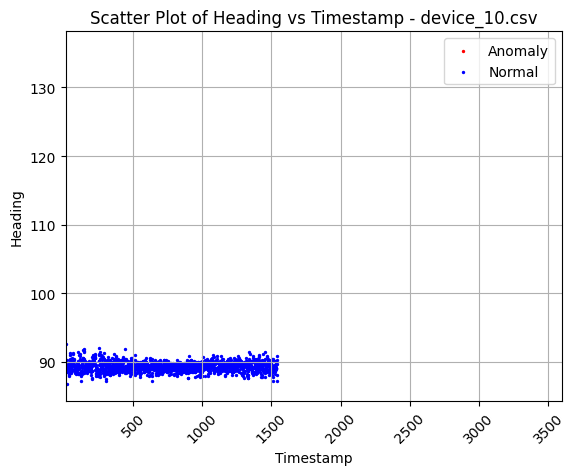

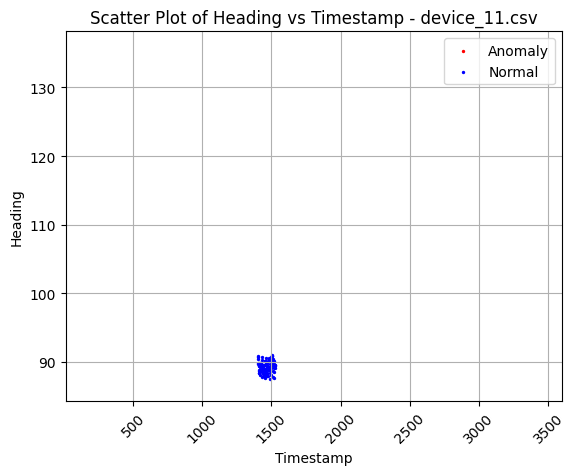

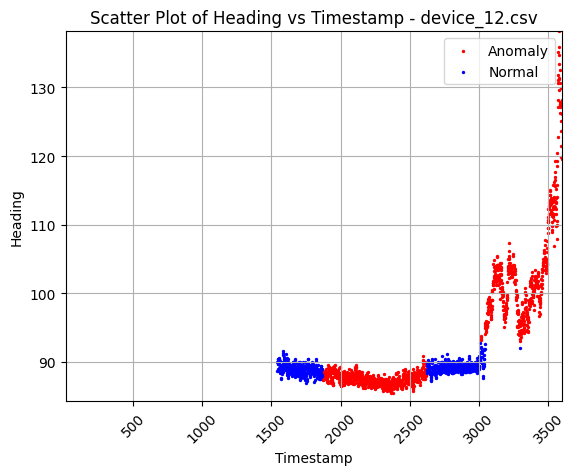

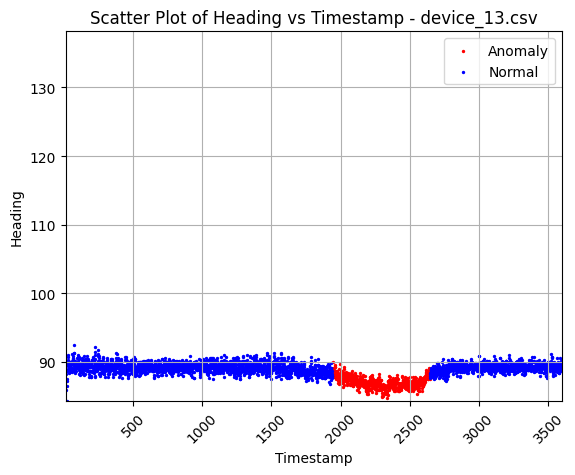

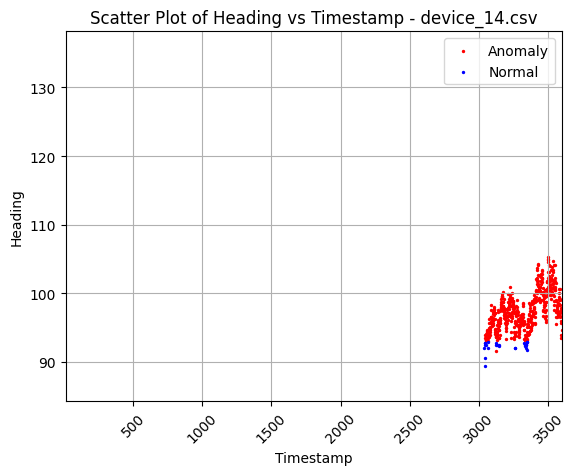

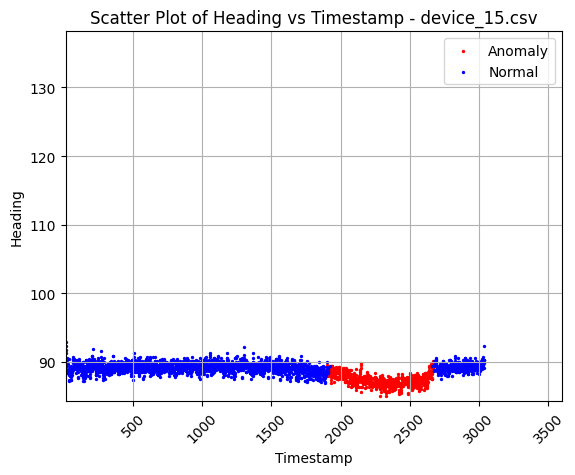

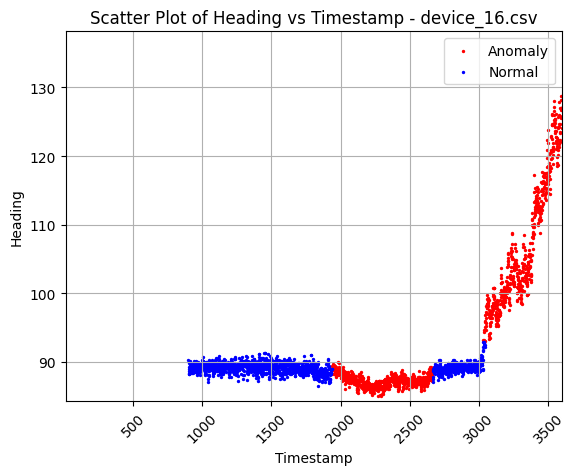

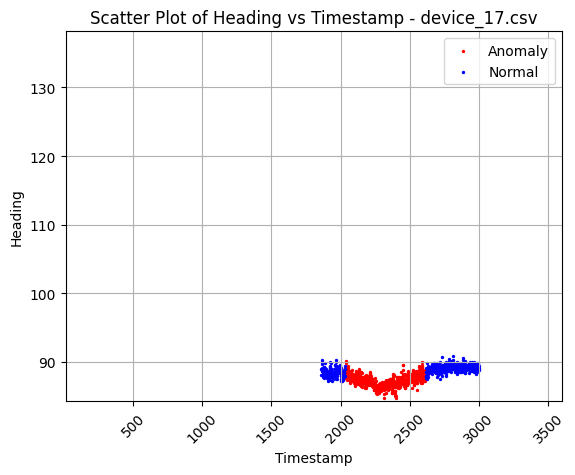

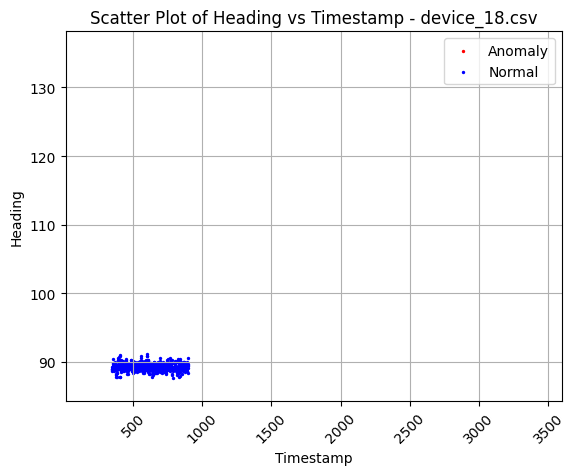

In [ ]:
# Function to plot scatter plot for each CSV file
def plot_scatter_for_csv(csv_file, min_timestamp, max_timestamp, min_heading, max_heading):
    # Load CSV file into a DataFrame
    data = pd.read_csv(csv_file)

    # Convert timestamp strings to seconds
    data['timestamp_seconds'] = data['timestamp'].apply(time_to_seconds)

    # Separate points labeled as 1
    data_anomaly = data[data['label'] == 1]
    data_normal = data[data['label'] != 1]

    # Plot scatter plot of 'Heading' vs 'timestamp'
    plt.figure()

    # Plot points labeled as 1 in red (anomaly)
    plt.scatter(data_anomaly['timestamp_seconds'], data_anomaly['Heading'], color='red', label='Anomaly', s=2)

    # Plot other points in blue (normal)
    plt.scatter(data_normal['timestamp_seconds'], data_normal['Heading'], color='blue', label='Normal', s=2)

    # Set the limits of the axes
    plt.xlim(min_timestamp, max_timestamp)
    plt.ylim(min_heading, max_heading)

    plt.xlabel('Timestamp')
    plt.ylabel('Heading')
    plt.title(f'Scatter Plot of Heading vs Timestamp - {csv_file}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)  # Add grid lines
    plt.legend()
    plt.show()

# Initialize variables to store overall minimum and maximum values of timestamp and Heading
min_timestamp, max_timestamp = float('inf'), float('-inf')
min_heading, max_heading = float('inf'), float('-inf')

# Iterate over each CSV file to find overall minimum and maximum values of timestamp and Heading
for i in range(1, len(break_indices) + 2):
    csv_file = f'device_{i}.csv'
    data = pd.read_csv(csv_file)
    min_timestamp = min(min_timestamp, data['timestamp'].apply(time_to_seconds).min())
    max_timestamp = max(max_timestamp, data['timestamp'].apply(time_to_seconds).max())
    min_heading = min(min_heading, data['Heading'].min())
    max_heading = max(max_heading, data['Heading'].max())

# Iterate over each CSV file and plot scatter plot
for i in range(1, len(break_indices) + 2):
    csv_file = f'device_{i}.csv'
    plot_scatter_for_csv(csv_file, min_timestamp, max_timestamp, min_heading, max_heading)

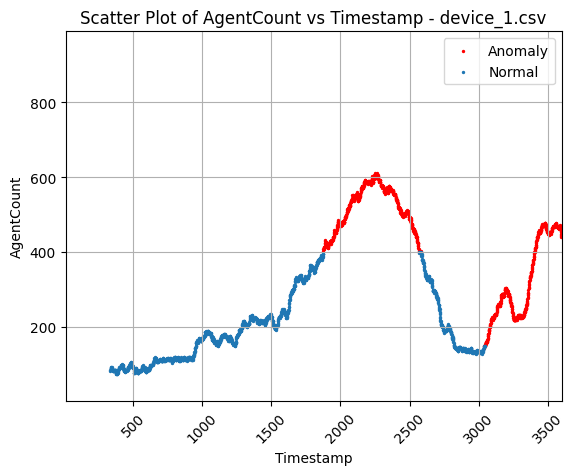

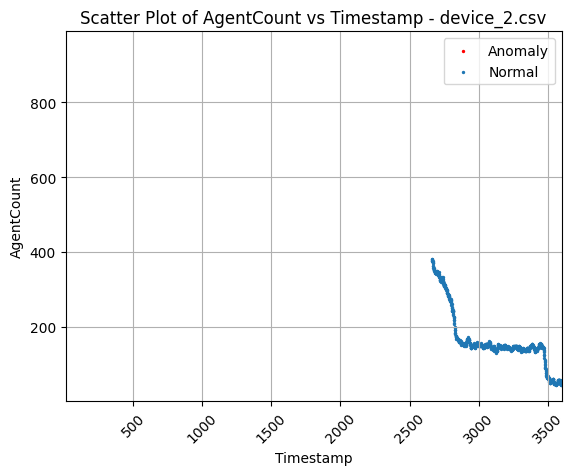

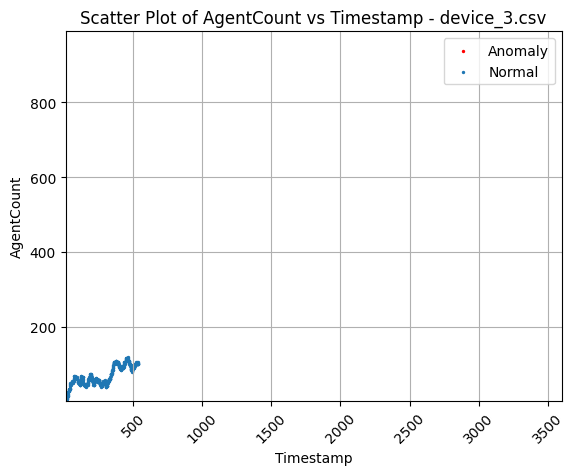

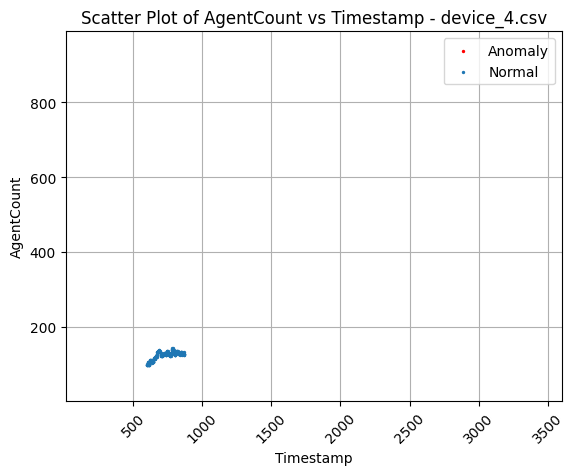

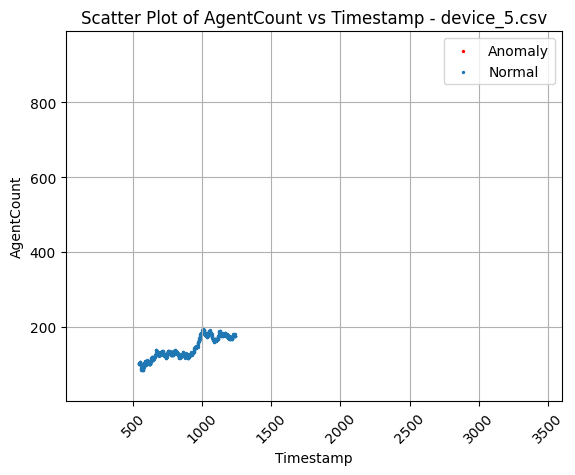

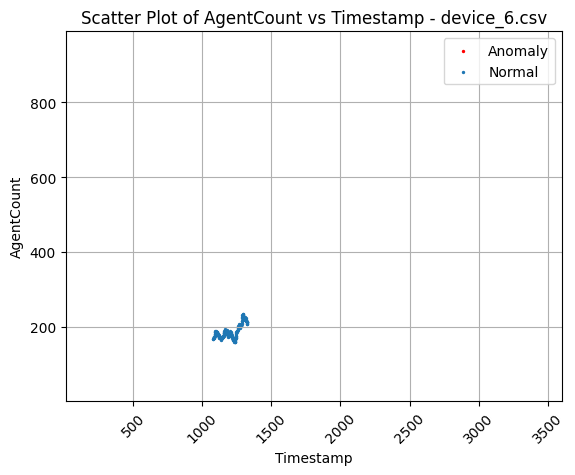

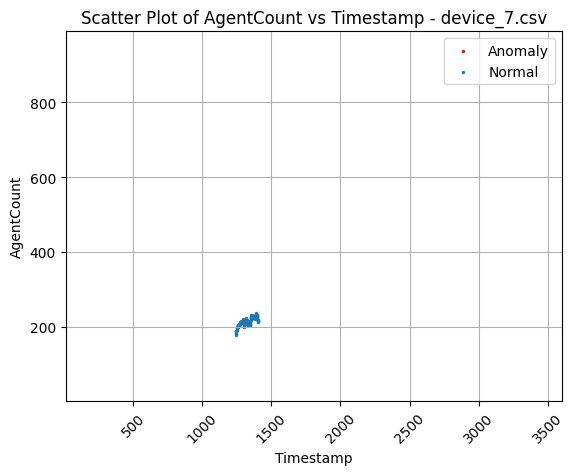

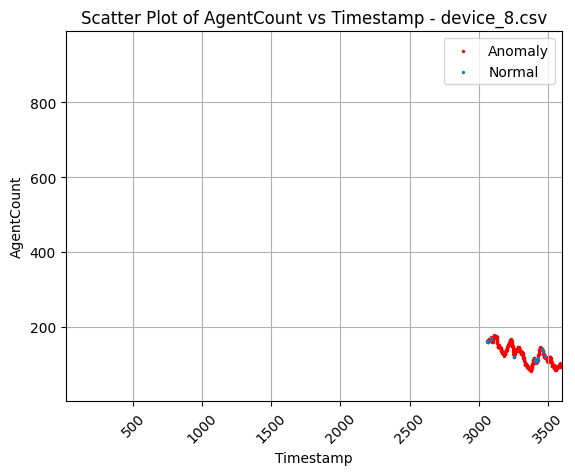

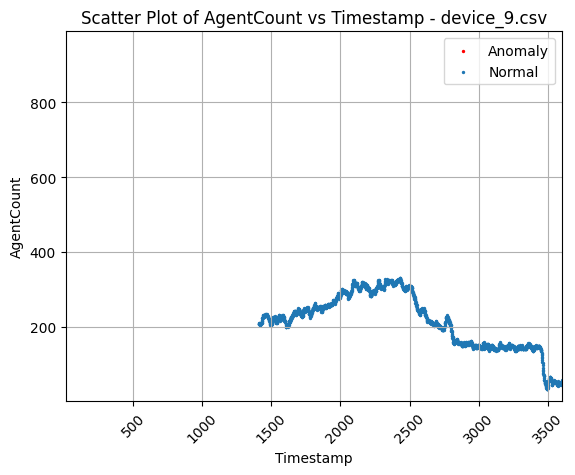

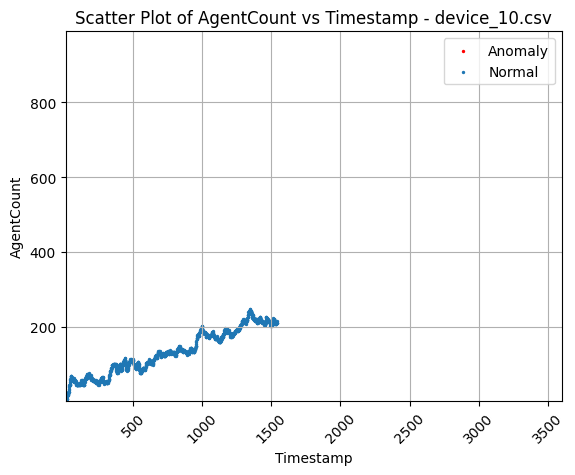

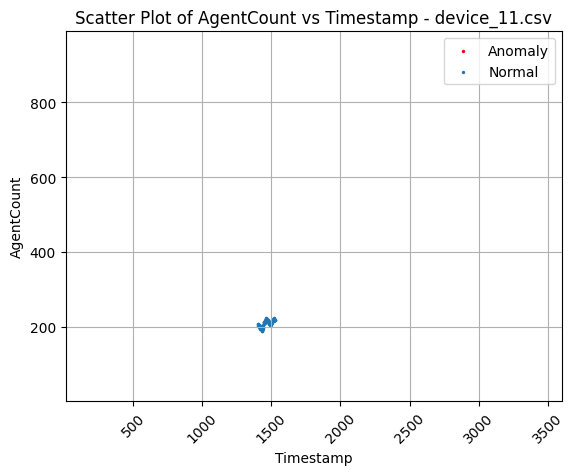

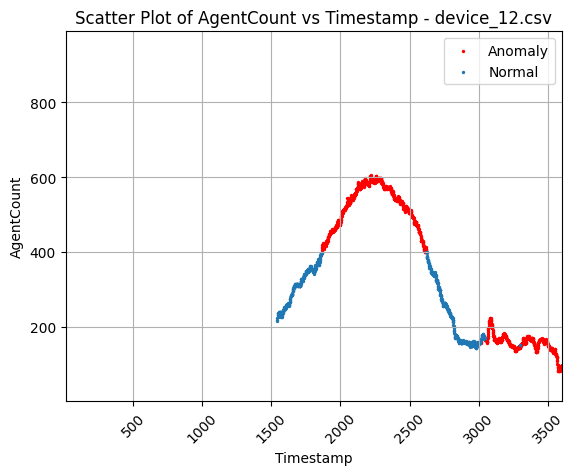

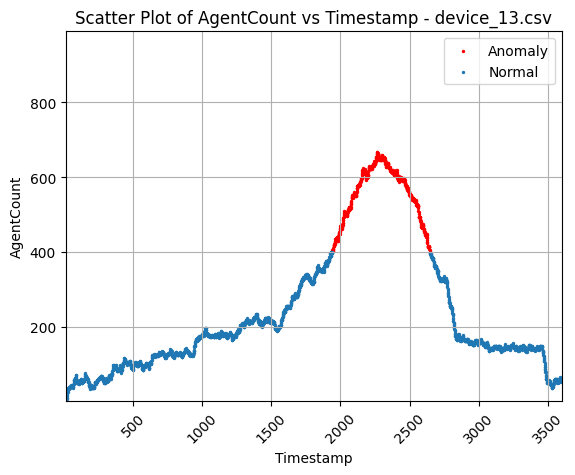

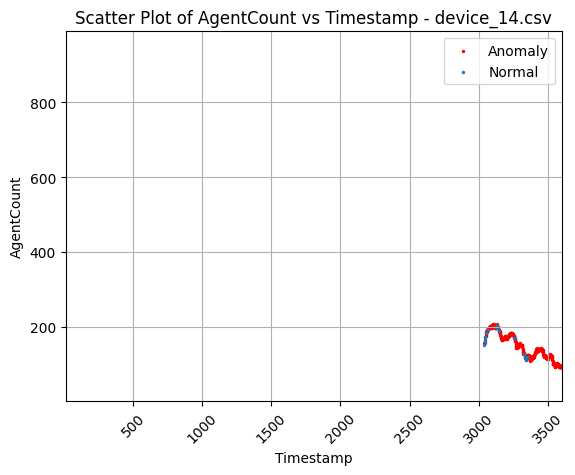

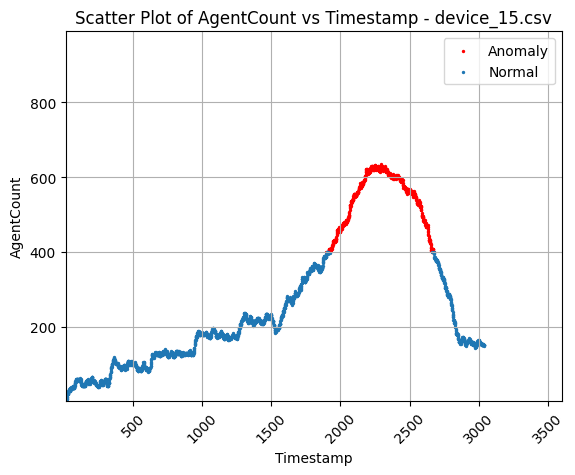

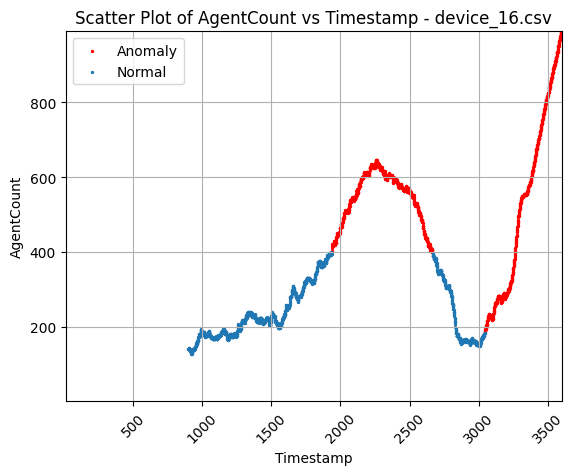

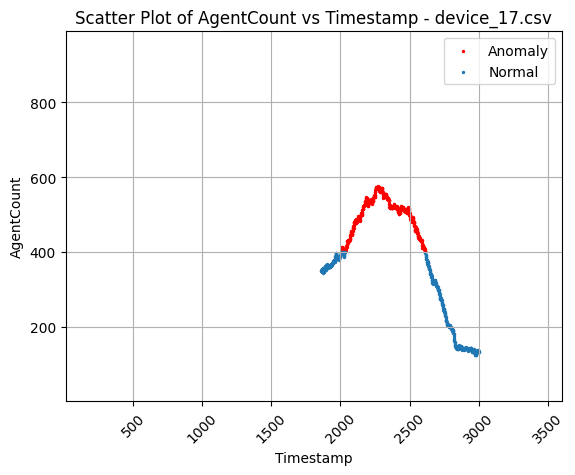

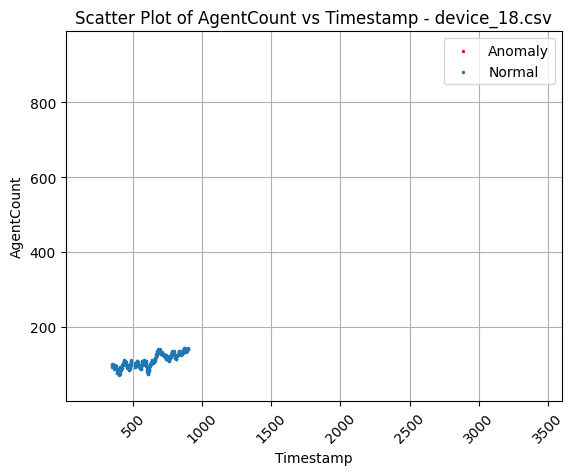

In [ ]:
# Function to convert time strings to seconds for easier comparison
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Function to plot scatter plot for each CSV file
def plot_scatter_for_csv(csv_file, min_timestamp, max_timestamp, min_agentcount, max_agentcount):
    # Load CSV file into a DataFrame
    data = pd.read_csv(csv_file)

    # Convert timestamp strings to seconds
    data['timestamp_seconds'] = data['timestamp'].apply(time_to_seconds)

    # Separate points labeled as 1
    data_label_1 = data[data['label'] == 1]
    data_other_labels = data[data['label'] != 1]

    # Plot scatter plot of 'AgentCount' vs 'timestamp'
    plt.figure()

    # Plot points labeled as 1 in red
    plt.scatter(data_label_1['timestamp_seconds'], data_label_1['AgentCount'], color='red', label='Anomaly', s=2)

    # Plot other points
    plt.scatter(data_other_labels['timestamp_seconds'], data_other_labels['AgentCount'], label='Normal', s=2)

    # Set the limits of the axes
    plt.xlim(min_timestamp, max_timestamp)
    plt.ylim(min_agentcount, max_agentcount)

    plt.xlabel('Timestamp')
    plt.ylabel('AgentCount')
    plt.title(f'Scatter Plot of AgentCount vs Timestamp - {csv_file}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)  # Add grid lines
    plt.legend()
    plt.show()

# Initialize variables to store overall minimum and maximum values of timestamp and AgentCount
min_timestamp, max_timestamp = float('inf'), float('-inf')
min_agentcount, max_agentcount = float('inf'), float('-inf')

# Iterate over each CSV file to find overall minimum and maximum values of timestamp and AgentCount
for i in range(1, len(break_indices) + 2):
    csv_file = f'device_{i}.csv'
    data = pd.read_csv(csv_file)
    min_timestamp = min(min_timestamp, data['timestamp'].apply(time_to_seconds).min())
    max_timestamp = max(max_timestamp, data['timestamp'].apply(time_to_seconds).max())
    min_agentcount = min(min_agentcount, data['AgentCount'].min())
    max_agentcount = max(max_agentcount, data['AgentCount'].max())

# Iterate over each CSV file and plot scatter plot
for i in range(1, len(break_indices) + 2):
    csv_file = f'device_{i}.csv'
    plot_scatter_for_csv(csv_file, min_timestamp, max_timestamp, min_agentcount, max_agentcount)

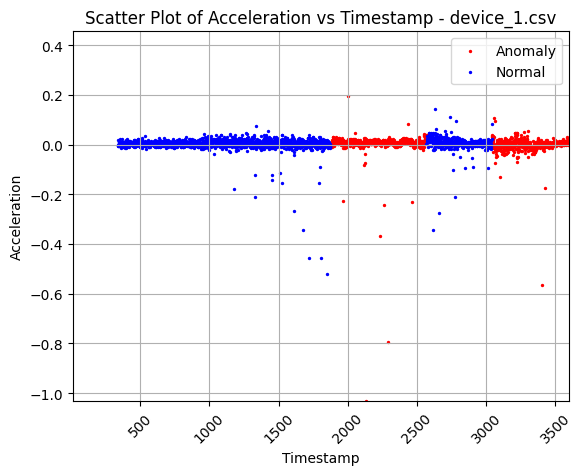

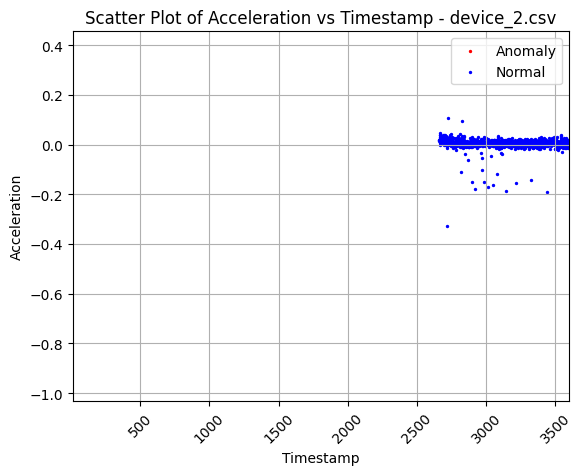

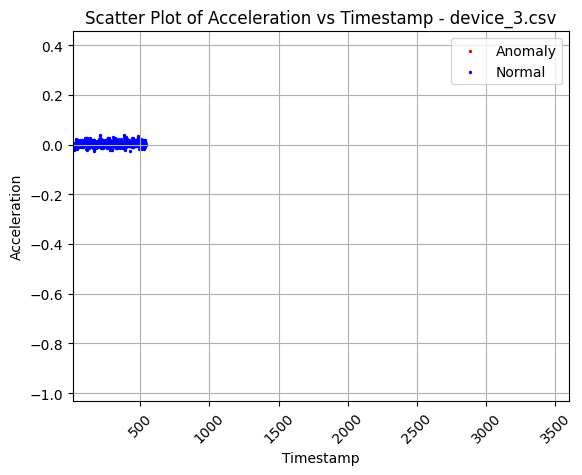

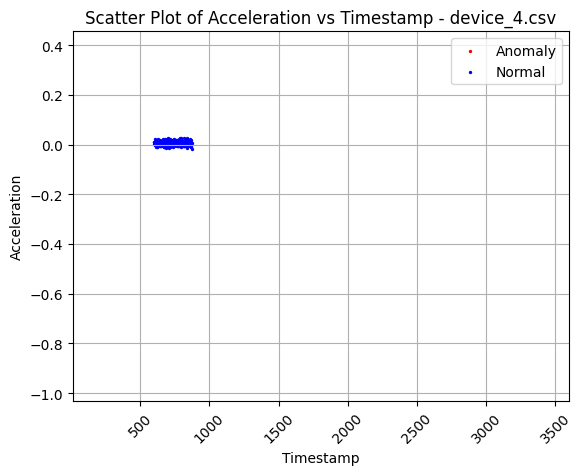

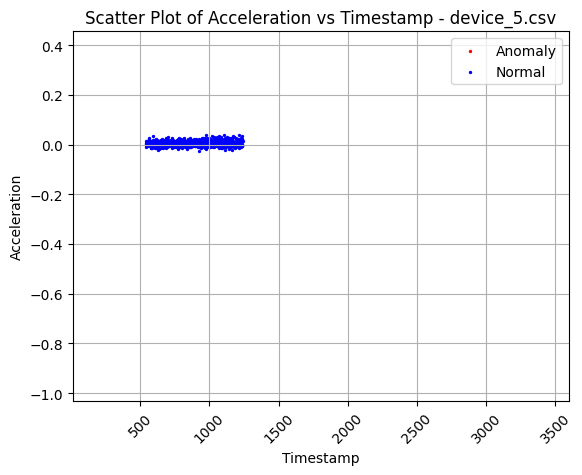

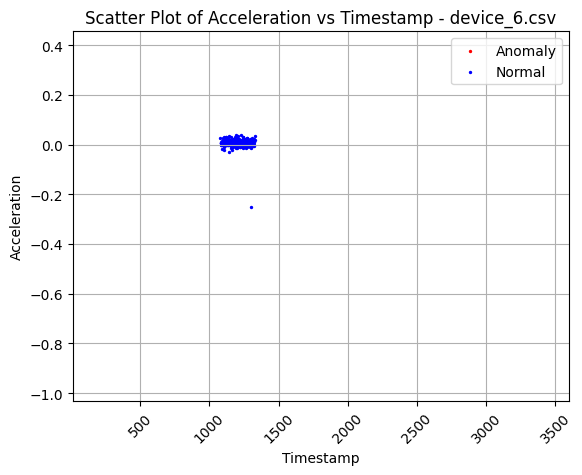

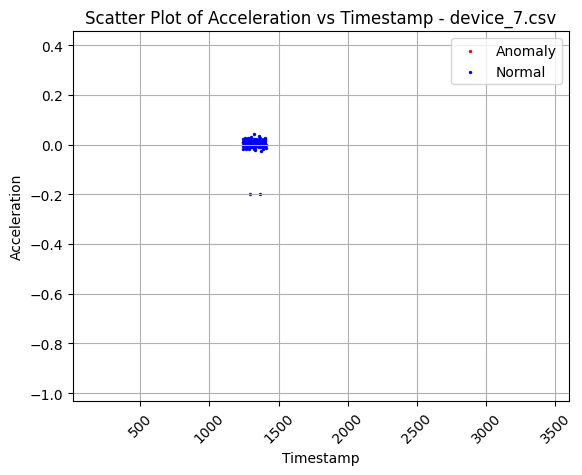

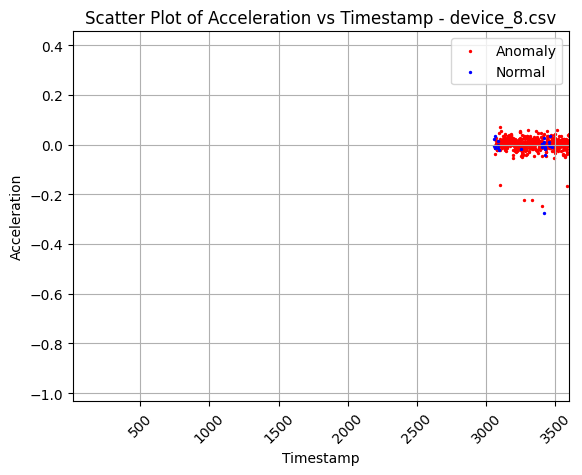

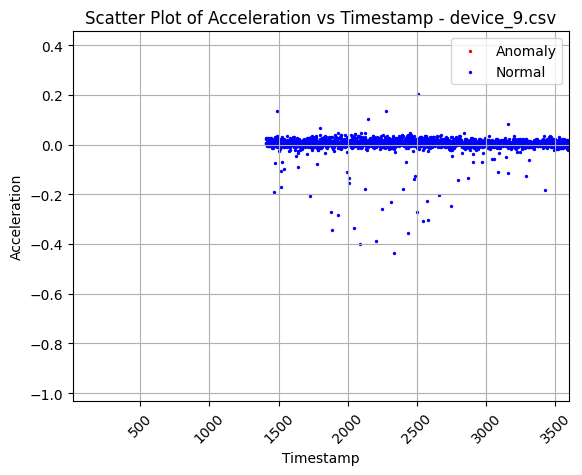

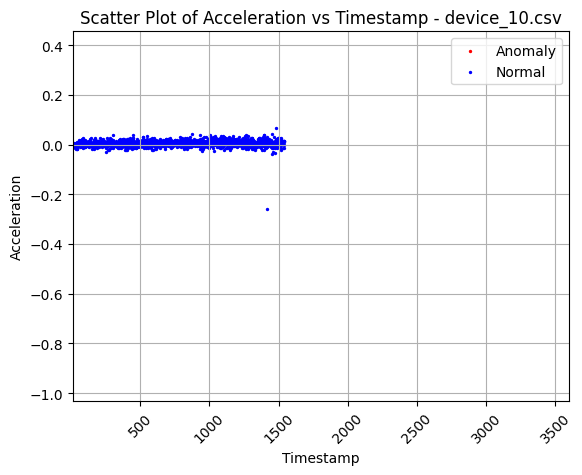

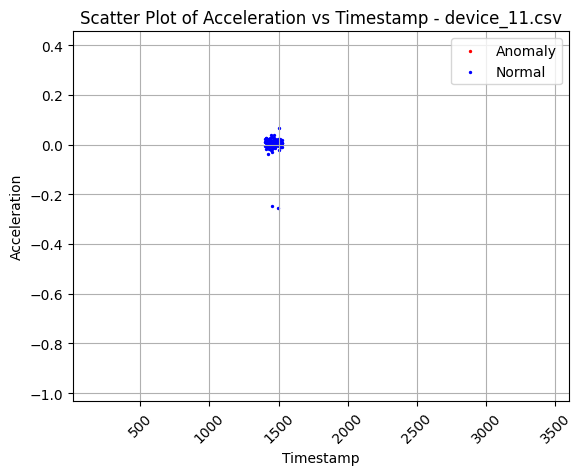

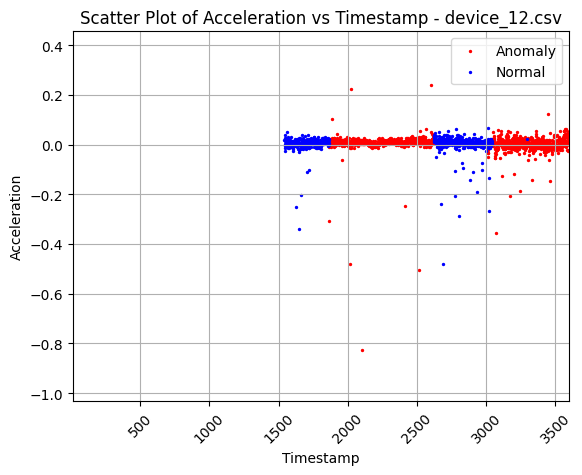

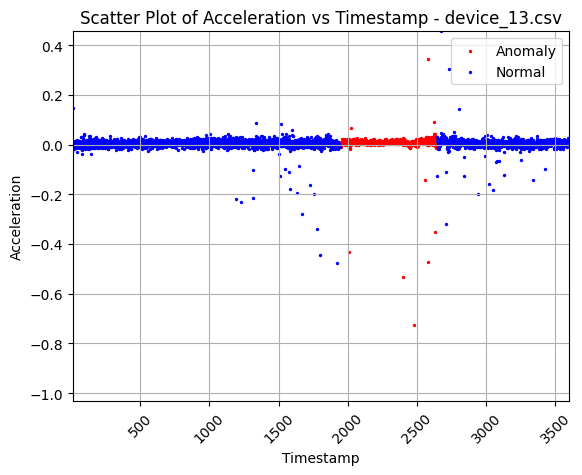

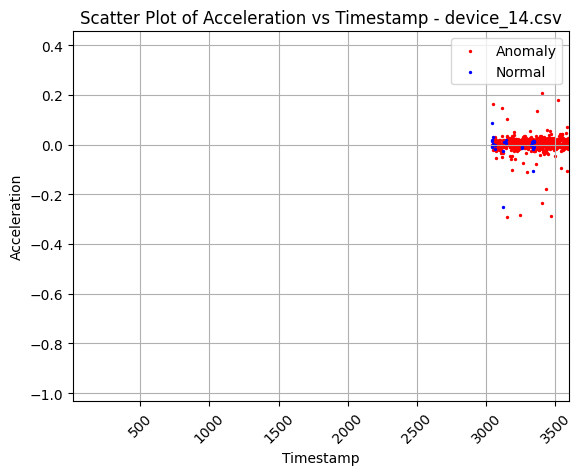

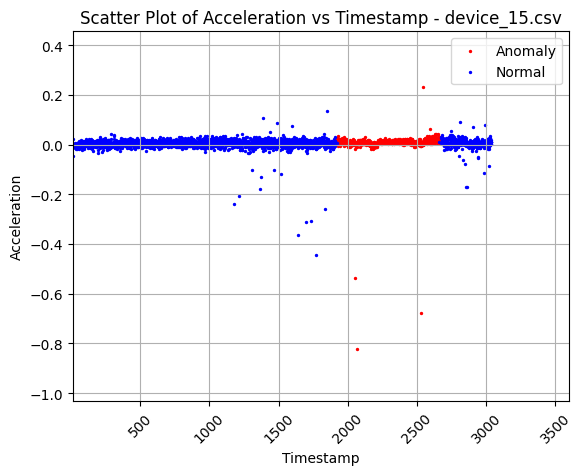

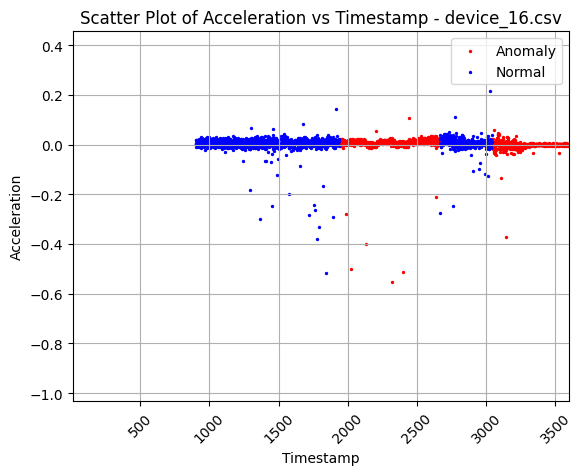

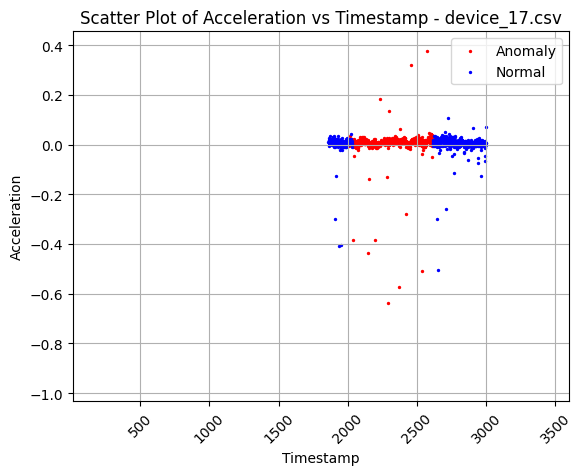

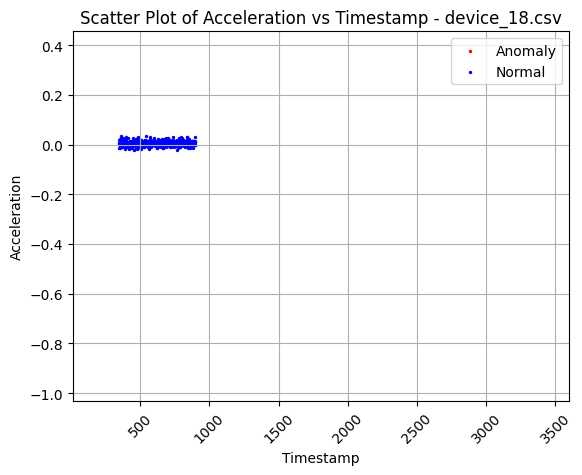

In [ ]:
# Function to plot scatter plot for each CSV file
def plot_scatter_for_csv(csv_file, min_timestamp, max_timestamp, min_acc, max_acc):
    # Load CSV file into a DataFrame
    data = pd.read_csv(csv_file)

    # Convert timestamp strings to seconds
    data['timestamp_seconds'] = data['timestamp'].apply(time_to_seconds)

    # Separate points labeled as 1
    data_anomaly = data[data['label'] == 1]
    data_normal = data[data['label'] != 1]

    # Plot scatter plot of 'Acc' vs 'timestamp'
    plt.figure()

    # Plot points labeled as 1 in red (anomaly)
    plt.scatter(data_anomaly['timestamp_seconds'], data_anomaly['Acc'], color='red', label='Anomaly', s=2)

    # Plot other points in blue (normal)
    plt.scatter(data_normal['timestamp_seconds'], data_normal['Acc'], color='blue', label='Normal', s=2)

    # Set the limits of the axes
    plt.xlim(min_timestamp, max_timestamp)
    plt.ylim(min_acc, max_acc)

    plt.xlabel('Timestamp')
    plt.ylabel('Acceleration')
    plt.title(f'Scatter Plot of Acceleration vs Timestamp - {csv_file}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)  # Add grid lines
    plt.legend()
    plt.show()

# Initialize variables to store overall minimum and maximum values of timestamp and Acceleration
min_timestamp, max_timestamp = float('inf'), float('-inf')
min_acc, max_acc = float('inf'), float('-inf')

# Iterate over each CSV file to find overall minimum and maximum values of timestamp and Acceleration
for i in range(1, len(break_indices) + 2):
    csv_file = f'device_{i}.csv'
    data = pd.read_csv(csv_file)
    min_timestamp = min(min_timestamp, data['timestamp'].apply(time_to_seconds).min())
    max_timestamp = max(max_timestamp, data['timestamp'].apply(time_to_seconds).max())
    min_acc = min(min_acc, data['Acc'].min())
    max_acc = max(max_acc, data['Acc'].max())

# Iterate over each CSV file and plot scatter plot
for i in range(1, len(break_indices) + 2):
    csv_file = f'device_{i}.csv'
    plot_scatter_for_csv(csv_file, min_timestamp, max_timestamp, min_acc, max_acc)